# Analyse DNS en 4G

### Recherche DNS pour dropbox.com


In [2]:
%%bash
whois dropbox.com

   Domain Name: DROPBOX.COM
   Registry Domain ID: 963471_DOMAIN_COM-VRSN
   Registrar WHOIS Server: whois.markmonitor.com
   Registrar URL: http://www.markmonitor.com
   Updated Date: 2023-05-26T09:22:02Z
   Creation Date: 1995-06-28T04:00:00Z
   Registry Expiry Date: 2025-06-27T04:00:00Z
   Registrar: MarkMonitor Inc.
   Registrar IANA ID: 292
   Registrar Abuse Contact Email: abusecomplaints@markmonitor.com
   Registrar Abuse Contact Phone: +1.2086851750
   Domain Status: clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited
   Domain Status: clientTransferProhibited https://icann.org/epp#clientTransferProhibited
   Domain Status: clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited
   Domain Status: serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited
   Domain Status: serverTransferProhibited https://icann.org/epp#serverTransferProhibited
   Domain Status: serverUpdateProhibited https://icann.org/epp#serverUpdateProhibited
   Name Server

In [3]:
%%bash
dig A dropbox.com +noall +answer

dropbox.com.		60	IN	A	162.125.248.18


In [4]:
%%bash
dig AAAA dropbox.com +noall +answer

dropbox.com.		60	IN	AAAA	2620:100:6040:18::a27d:f812


In [5]:
%%bash
dig NS dropbox.com +noall +answer

dropbox.com.		165	IN	NS	ns-315.awsdns-39.com.
dropbox.com.		165	IN	NS	ns-1949.awsdns-51.co.uk.
dropbox.com.		165	IN	NS	ns-1162.awsdns-17.org.
dropbox.com.		165	IN	NS	ns-564.awsdns-06.net.


In [6]:
%%bash
dig CNAME dropbox.com +noall +answer

In [7]:
%%bash
dig TXT dropbox.com +noall +answer

dropbox.com.		299	IN	TXT	"atlassian-domain-verification=yjrZDQ/hCS3k4pk87lelfsKb7+aOLpQPPgowWw/RHEwDCvNo8zH2iNCjFjZZtPvT"
dropbox.com.		299	IN	TXT	"aws-domain-control-verification=295d3c77-d647-4042-a10b-17bc6cf2a81c"
dropbox.com.		299	IN	TXT	"liveramp-site-verification=l9GQet4bxvwWtgD1svh_74N5vOes7buz_drCyiY-dV4"
dropbox.com.		299	IN	TXT	"hubspot-developer-verification=YTQ0MmYzMzItYjhhOC00YzhlLTg3ZDYtMjU3NWQ4OWY4MDNk"
dropbox.com.		299	IN	TXT	"zapier-domain-verification-challenge=2d9f161a-cc7a-4780-862d-04aa31320698"
dropbox.com.		299	IN	TXT	"stripe-verification=d0a25558a690907c8476879165000a457c5521640f0be53b0d1acf5f4c311978"
dropbox.com.		299	IN	TXT	"google-site-verification=6Gs0C-CwJui707tVZirEFGKvKfGtwwZf2Snzz0-2nUQ"
dropbox.com.		299	IN	TXT	"notion-domain-verification=enHWmn6FFlHvaUid8AdXGKPkDn7j1VVAKudIomtvw0z"
dropbox.com.		299	IN	TXT	"miro-verification=06f0d83f07b5b7c1936df29f6dc8a6a11cf82d08"
dropbox.com.		299	IN	TXT	"mgverify=32a6a13661e86bff81acaf247c1dd6c5991bccc6a77dbe49f

In [8]:
%%bash
dig MX dropbox.com +noall +answer

dropbox.com.		281	IN	MX	10 mxa-001ed902.gslb.pphosted.com.
dropbox.com.		281	IN	MX	10 mxb-001ed902.gslb.pphosted.com.


### Analyse des frames Wireshark

Ce script Bash analyse des fichiers de capture Wireshark pour extraire les requêtes DNS et les adresses IP source et destination, puis les enregistre dans des fichiers CSV distincts dans un dossier spécifié.

In [9]:
%%bash

echo "Let's go"
CAPTURE_DIR="/home/user/Desktop/capture/4G/wireshark"

mkdir -p "${CAPTURE_DIR}/dns_csv/img"

# Fichiers de capture à analyser
declare -a captures=("0_4G_before.pcapng" "1_4G_connexion.pcapng" "2_4G_folder.pcapng" "3a_4G_upload_word.pcapng" "3b_4G_upload_video.pcapng" "4a_4G_visu_word.pcapng" "4b_4G_visu_video.pcapng" "5a_4G_download_word.pcapng" "5b_4G_download_video.pcapng" "6_4G_delete_video.pcapng" "7_4G_share_word.pcapng" "8_4G_modif_shared_word.pcapng" "9_4G_deconnexion.pcapng")

# Analyser chaque capture
for capture in "${captures[@]}"; do
  echo "Analyse de la capture: $capture"
  # Ajout des champs ip.src et ip.dst pour les adresses IP source et destination
  tshark -r "$CAPTURE_DIR/$capture" -Y "dns" -T fields -e frame.time -e dns.qry.name -e dns.qry.type -e ip.src -e ip.dst -E header=y -E separator=, -E quote=d > "${CAPTURE_DIR}/dns_csv/${capture}_dns_analysis.csv"
done

echo "Analyse terminée."


Let's go
Analyse de la capture: 0_4G_before.pcapng
Analyse de la capture: 1_4G_connexion.pcapng
Analyse de la capture: 2_4G_folder.pcapng
Analyse de la capture: 3a_4G_upload_word.pcapng
Analyse de la capture: 3b_4G_upload_video.pcapng
Analyse de la capture: 4a_4G_visu_word.pcapng
Analyse de la capture: 4b_4G_visu_video.pcapng
Analyse de la capture: 5a_4G_download_word.pcapng
Analyse de la capture: 5b_4G_download_video.pcapng
Analyse de la capture: 6_4G_delete_video.pcapng
Analyse de la capture: 7_4G_share_word.pcapng
Analyse de la capture: 8_4G_modif_shared_word.pcapng
Analyse de la capture: 9_4G_deconnexion.pcapng
Analyse terminée.


Le script Python suivant utilise la bibliothèque Pandas pour fusionner les fichiers CSV contenant des analyses DNS, en excluant un fichier spécifique (= capture des frames avant les tests), puis filtre les résultats fusionnés pour inclure uniquement les domaines DNS qui ne sont pas présents dans le fichier exclu. Les résultats filtrés sont ensuite enregistrés dans un nouveau fichier CSV.

In [10]:
import pandas as pd
import glob

path = '/home/user/Desktop/capture/4G/wireshark/dns_csv/' 
all_files = glob.glob(path + "*.csv")

file_to_exclude = 'wireshark/dns_csv/0_4G_before.pcapng_dns_analysis.csv'

all_files_to_merge = [f for f in all_files if f!= file_to_exclude]

df_merged = pd.concat((pd.read_csv(f) for f in all_files_to_merge))
df_before = pd.read_csv(file_to_exclude)

unique_domains_before = df_before['dns.qry.name'].unique()

df_filtered = df_merged[~df_merged['dns.qry.name'].isin(unique_domains_before)]

df_filtered.to_csv('wireshark/dns_csv/merged_dns_analysis.csv', index=False)


On affiche ici les dix principales requêtes DNS sous forme de tableau et d'histogramme avec des annotations.

Top 10 des requêtes DNS par nom de domaine :


,Nom de Domaine,Nombre de Requêtes
0,bolt.v.dropbox.com,170
1,d-edge.v.dropbox.com,82
2,stun.fpapi.io,48
3,d.dropbox.com,32
4,bolt.dropbox.com,24
5,previews.dropbox.com,20
6,www.dropbox.com,20
7,fp2e7a.wpc.phicdn.net,16
8,cdn.dropboxexperiment.com,14
9,onedscolprdweu05.westeurope.cloudapp.azure.com,14


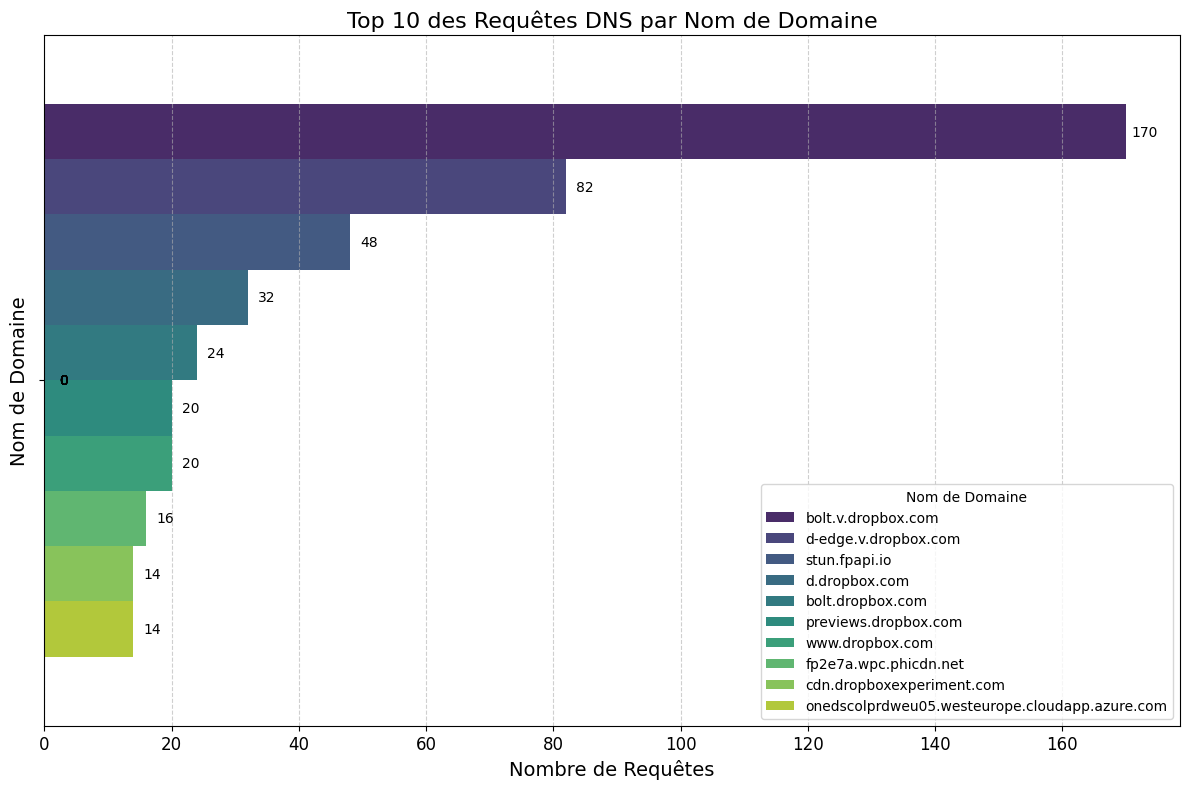

In [11]:
# !pip install --upgrade seaborn pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('wireshark/dns_csv/merged_dns_analysis.csv')

domain_counts = df['dns.qry.name'].value_counts().head(10)

# Convertir en DataFrame pour un affichage sous forme de tableau
domain_counts_df = domain_counts.reset_index()
domain_counts_df.columns = ['Nom de Domaine', 'Nombre de Requêtes']

# Affichage élégant sous forme de tableau
print("Top 10 des requêtes DNS par nom de domaine :")
display(domain_counts_df)  # Utiliser 'display' pour un affichage plus esthétique dans Jupyter

# Créer l'histogramme
plt.figure(figsize=(12, 8))
barplot = sns.barplot(hue='Nom de Domaine', x='Nombre de Requêtes', data=domain_counts_df, palette="viridis")
plt.title('Top 10 des Requêtes DNS par Nom de Domaine', fontsize=16)
plt.xlabel('Nombre de Requêtes', fontsize=14)
plt.ylabel('Nom de Domaine', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajouter des annotations pour chaque bâtonnet
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 3, 
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width),  
             ha='center', va='center')

plt.tight_layout() 
plt.show()


Ici, on cherche à visualiser la répartition des types de requêtes DNS. On crée un diagramme circulaire (pie chart) avec des pourcentages et une légende pour chaque type de requête DNS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

type_labels = {
    1: 'A (IPv4 address)',
    28: 'AAAA (IPv6 address)',
    
}

type_counts = df['dns.qry.type'].map(type_labels).value_counts()

# Créer le diagramme
plt.figure(figsize=(10, 6))
type_counts.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Répartition des Types de Requêtes DNS', fontsize=16)
plt.ylabel('') 

plt.legend(title='Type de Requête DNS', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

Chaque CSV (ou scénario de test) est traité individuellement pour créer des histogrammes et des diagrammes circulaires spécifiques à chaque ensemble de données. Cela permet d'analyser les caractéristiques spécifiques de chaque fichier CSV. Ces graphes se trouveront dans /wireshark/dns_csv/img/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os 
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

path = 'wireshark/dns_csv/'
img_path = path + 'img/' 

if not os.path.exists(img_path):
    os.makedirs(img_path)

all_files = glob.glob(path + "*.csv")

for filename in all_files:
    df = pd.read_csv(filename)

    df['frame.time'] = pd.to_datetime(df['frame.time'], format="%b %d, %Y %H:%M:%S.%f CET")

    base_filename = os.path.basename(filename)

    domain_counts = df['dns.qry.name'].value_counts().head(10) 
    plt.figure(figsize=(12, 8))
    sns.barplot(x=domain_counts.values, hue=domain_counts.index, palette="viridis")
    plt.title('Top 10 des Requêtes DNS par Nom de Domaine')
    plt.xlabel('Nombre de Requêtes')
    plt.ylabel('Nom de Domaine')
    plt.savefig(img_path + base_filename + '_domain_histogram.png') 
    plt.close()

    type_counts = df['dns.qry.type'].value_counts()
    plt.figure(figsize=(10, 6))
    type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    plt.title('Répartition des Types de Requêtes DNS')
    plt.ylabel('')
    plt.savefig(img_path + base_filename + '_type_pie_chart.png') 
    plt.close()

    


L'idée ici est de calculer les proportions des types de requêtes DNS (type 1 et type 28) pour chaque scénario de test et de les représenter dans un graphe.

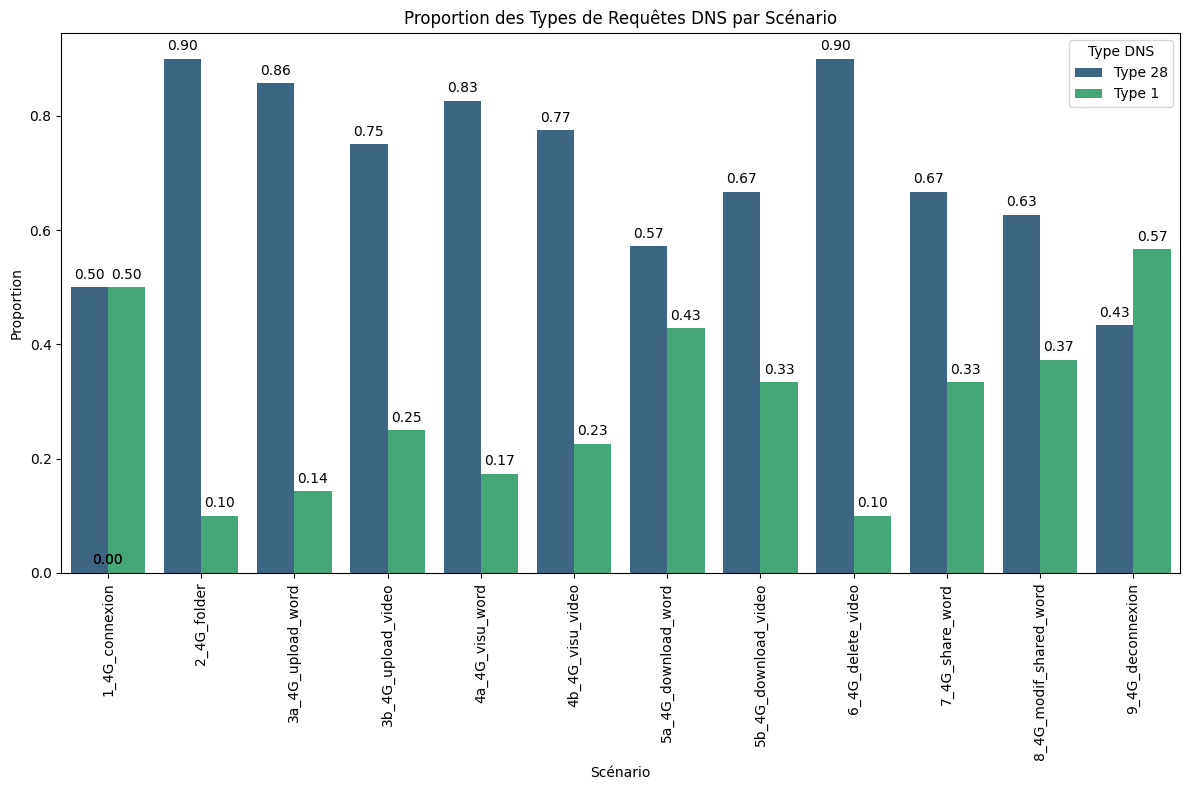

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

path = 'wireshark/dns_csv/'
all_files = glob.glob(path + "*.csv")

files_to_exclude = ['0_4G_before.pcapng_dns_analysis.csv', 'merged_dns_analysis.csv']
csv_files = [f for f in all_files if not any(excl_file in f for excl_file in files_to_exclude)]

data = {'Scenario': [], 'Type 1': [], 'Type 28': []}

for filename in csv_files:
    df = pd.read_csv(filename)
    scenario_name = os.path.basename(filename).split('.')[0]  
    type1_count = len(df[df['dns.qry.type'] == 1])
    type28_count = len(df[df['dns.qry.type'] == 28])
    total_count = len(df)
    
    if total_count > 0:  
        data['Scenario'].append(scenario_name)
        data['Type 1'].append(type1_count / total_count)
        data['Type 28'].append(type28_count / total_count)

df_proportions = pd.DataFrame(data)

df_melted = df_proportions.melt(id_vars=["Scenario"], var_name="Type", value_name="Proportion")

df_proportions_sorted = df_proportions.sort_values('Scenario')

df_melted_sorted = df_proportions_sorted.melt(id_vars=["Scenario"], var_name="Type", value_name="Proportion")
df_melted_sorted = df_melted.sort_values(by='Scenario')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Scenario", y="Proportion", hue="Type", data=df_melted_sorted, palette="viridis")

plt.title('Proportion des Types de Requêtes DNS par Scénario')
plt.xlabel('Scénario')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.legend(title='Type DNS')
plt.tight_layout()
plt.show()


Script qui delete tous les fichiers générés par le notebook.

In [ ]:
import glob
import os

path = '/home/user/Desktop/capture/4G/wireshark/dns_csv/img/'
png_files = glob.glob(path + "*.png")

# Supprimer chaque fichier PNG trouvé
for png_file in png_files:
    os.remove(png_file)
    print(f"Supprimé : {png_file}")

print("Tous les fichiers PNG ont été supprimés du dossier wireshark/dns_csv/img/")


path = '/home/user/Desktop/capture/4G/wireshark/dns_csv/'

csv_files = glob.glob(path + "*.csv")

# Supprimer chaque fichier PNG trouvé
for csv_file in csv_files:
    os.remove(csv_file)
    print(f"Supprimé : {csv_file}")

print("Tous les fichiers CSV ont été supprimés du dossier wireshark/dns_csv/")


In [11]:
import socket
import dns.resolver
import pandas as pd

def check_dns_security(domain):

    try:
        ip_address = socket.gethostbyname(domain)
        print(f"Le DNS pour le domaine {domain} est sécurisé avec technique 1. L'adresse IP est {ip_address}.")
    except socket.gaierror as e:
        print(f"Impossible de résoudre le domaine {domain}. Erreur : {e}")
        return False
  
    # Requête DNS pour obtenir les enregistrements MX
    try:
        mx_records = dns.resolver.resolver(domain, 'MX')
    except :
        print(f"Le domaine {domain} n'existe pas.")
        return False

    # Vérification de la présence de DANE
    dane_records = dns.resolver.query(domain, 'TLSA')

    # Si DANE est présent et que tous les enregistrements MX sont valides, le DNS est sécurisé
    if dane_records and all(mx.exchange.lower() in dane_records.to_text() for mx in mx_records):
        print(f"Le DNS pour le domaine {domain} est sécurisé avec technique 1. L'adresse IP est {ip_address}.")

    # Sinon, le DNS n'est pas sécurisé
    print(f"Le domaine {domain} n'existe pas.")
    return False    

df = pd.read_csv('dns_csv\1_wifi_connexion.pcapng_dns_analysis.csv')
for domaine in df['dns.qry.name'].unique:
    check_dns_security(domaine)

OSError: [Errno 22] Invalid argument: 'dns_csv\x01_wifi_connexion.pcapng_dns_analysis.csv'